# Laboration - skolstatistik

## Uppgift 0 - uppvärmning med riket

### a)

In [2]:
import pandas as pd

[df_math, df_english, df_swedish, df_sfi] = [
    pd.read_excel("./data/riket2023_åk9_np.xlsx", sheet_name=sheet, skiprows=8)
    for sheet in ["Matematik", "Engelska", "Svenska", "Svenska som andraspråk"]
]

for df in [df_math, df_english, df_swedish, df_sfi]:
    df.columns = [
        "Plats",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (poäng)",
        "Flickor (poäng)",
        "Pojkar (poäng)",
    ]

df_sfi

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
3,Riket,Skolverket,..,..,..,..,..,..,..,..,..


### b)

In [3]:
[total_f, girls_f, boys_f] = [
    int(df_math.at[0, f"{name} (A-F)"] * ((100 - df_math.at[0, f"{name} (A-E)"]) / 100))
    for name in ["Totalt", "Flickor", "Pojkar"]
]

print(f"Totalt fick {total_f} elever underkänt i matte, av dessa så var {girls_f} flickor och {boys_f} pojkar.")

Totalt fick 11637 elever underkänt i matte, av dessa var 5824 flickor och 5797 pojkar.


### c)

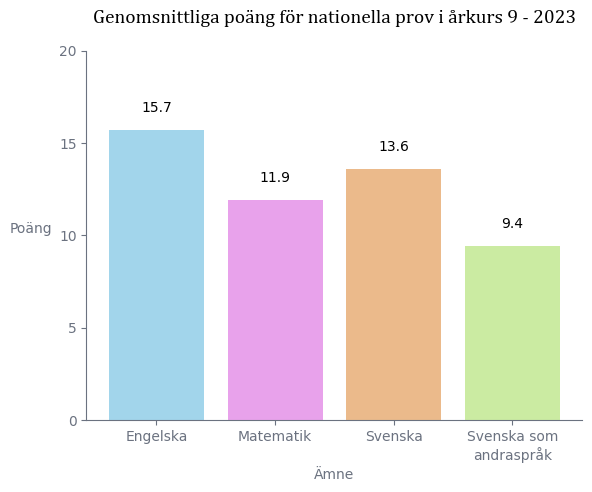

In [10]:
import matplotlib.pyplot as plt
import numpy as np


# Gotten from: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 1, y[i], ha="center")


x = np.array(["Engelska", "Matematik", "Svenska", "Svenska som\nandraspråk"])
y = np.array(
    [df.at[0, "Totalt (poäng)"] for df in [df_english, df_math, df_swedish, df_sfi]]
)

GRAY1 = "#6b7280"

color = ["#A2D5EB", "#E8A2EB", "#EBBA8B", "#CBEBA2"]

ax = plt.subplot(111)

ax.bar(x, y, color=color)
ax.set_title(
    "Genomsnittliga poäng för nationella prov i årkurs 9 - 2023",
    fontdict={"fontsize": 14},
    pad=20,
).set_fontname("cambria")
ax.set_xlabel("Ämne", color=GRAY1)
ax.set_ylabel("Poäng", rotation=0, labelpad=20, color=GRAY1)
ax.set_yticks(range(0, 21, 5))
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color(GRAY1)
ax.tick_params(colors=GRAY1)
addlabels(x, y)

In [5]:
girls_f = int(df_math.at[0, "Flickor (A-F)"] * ((100 - df_math.at[0, "Flickor (A-E)"])/100))

girls_f

5824